<a href="https://colab.research.google.com/github/aratinj/ovi_kaggle/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive drive.mount('/content/drive')

Import library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras import Conv2D, MaxPooling2D, Dropout, BatchNormalization, activations
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

Import Dataset

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/dl/train.csv')
test =pd.read_csv('/content/drive/MyDrive/dl/test.csv')
train.shape,test.shape

((42000, 785), (28000, 784))

Looking at a few rows

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
train.isna().sum().any()

False

In [ ]:
test.isna().sum().any()

False

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


Checking null values

In [ ]:
train.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [ ]:
test.isnull().sum()

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [ ]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
x_train = train.drop('label',axis = 1)
y_train = train['label']

In [ ]:
x_train.shape, y_train.shape

((42000, 784), (42000,))

Normalize or Standardize Data

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Reshape Data

In [ ]:
x_train_reshape = x_train.values.reshape(-1,28,28,1)
x_test_reshape = x_test.values.reshape(-1,28,28,1)

train_test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 20)

In [ ]:
x_train.shape,x_val.shape,y_train.shape

((33600, 784), (8400, 784), (33600,))

In [ ]:
x_train.iloc[0].shape

(784,)

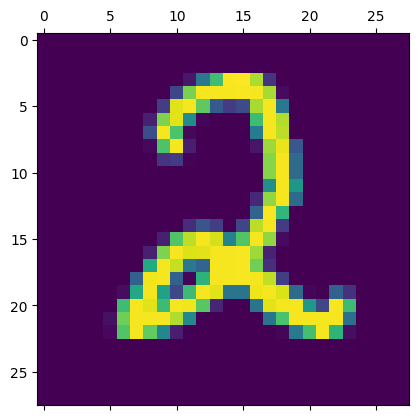

In [ ]:
import matplotlib.pyplot as plt
# plt.imshow(x_train.iloc[0].values.reshape(28,28))
plt.matshow(x_train.iloc[0].values.reshape(28,28))

Train Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [ ]:
model.compile( optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics =['accuracy'] )

In [ ]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_val = x_val.values.reshape(-1, 28, 28, 1)
model_history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 46ms/step - accuracy: 0.6971 - loss: 2.2808 - val_accuracy: 0.9675 - val_loss: 0.1167
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 35ms/step - accuracy: 0.9350 - loss: 0.2052 - val_accuracy: 0.9773 - val_loss: 0.0864
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.9561 - loss: 0.1474 - val_accuracy: 0.9812 - val_loss: 0.0717
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 35ms/step - accuracy: 0.9665 - loss: 0.1108 - val_accuracy: 0.9798 - val_loss: 0.0749
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.9697 - loss: 0.1004 - val_accuracy: 0.9840 - val_loss: 0.0671


Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(x_val, y_val, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 98.40%


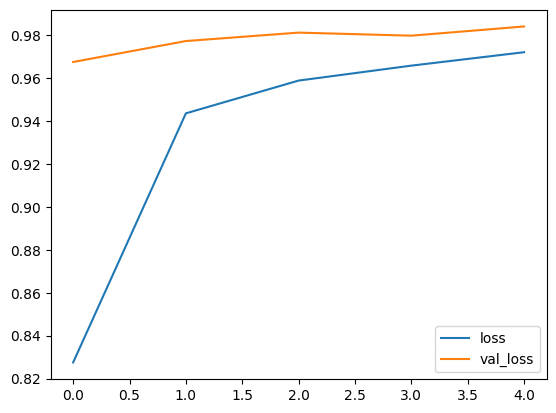

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['loss','val_loss'])

In [ ]:
x_train.dtype

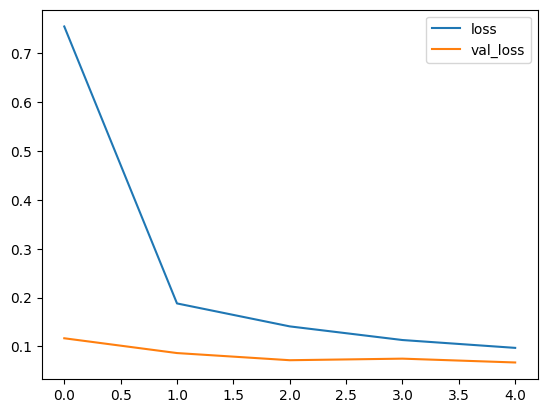

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.legend(['loss','val_loss'])

Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
datagen = ImageDataGenerator(
          rotation_range = 5,
          width_shift_range = 0.1,
          height_shift_range = 0.1,
          zoom_range = 0.05
)
datagen.fit(x_train)

Early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1,28,28,1)
model_history = model.fit(
    datagen.flow(x_train, y_train),
    validation_data=(x_val, y_val),
    epochs=5,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 53s 50ms/step - accuracy: 0.9680 - loss: 0.1022 - val_accuracy: 0.6431 - val_loss: 209.3294 - learning_rate: 0.0010
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9718 - loss: 0.0992 - val_accuracy: 0.6740 - val_loss: 182.5875 - learning_rate: 0.0010
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.9747 - loss: 0.0829 - val_accuracy: 0.7605 - val_loss: 105.0015 - learning_rate: 0.0010
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9753 - loss: 0.0842 - val_accuracy: 0.7199 - val_loss: 145.8922 - learning_rate: 0.0010
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 85s 53ms/step - accuracy: 0.9754 - loss: 0.0832 - val_accuracy: 0.7852 - val_loss: 104.7289 - learning_rate: 0.0010


In [ ]:
test_loss, test_accuracy = model.evaluate(x_val, y_val, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 78.52%
